# Hierarchical Clustering

### HierarchicalClustering, progressively generates n different partitions of the underlying data into clusters, all represented by a tree in which each node is labeled by a cluster of genes. The first partition has n single-element clusters represented by the leaves of the tree, with each element forming its own cluster. The second partition merges the two “closest” clusters into a single cluster consisting of two elements. In general, the i-th partition merges the two closest clusters from the (i - 1)-th partition and has n - i + 1 clusters. I hope this algorithm looks familiar — it is UPGMA .

In [34]:
import networkx as nx
def h_clustr(matrix,n):
    clusters=[]
    for i in range(n):
        clusters.append([i])
    #print(clusters)
    nodes=[]
    for j in range(n):
        nodes.append(str([j]))
    t=nx.DiGraph()
    t.add_nodes_from(nodes)
    while len(clusters)>1:
        close_c=search(clusters,matrix)
        #print(close_c)
        c_new=close_c[0]+close_c[1]
        t.add_node(str(c_new))
        t.add_edges_from([(str(close_c[0]),str(c_new)),(str(close_c[1]),str(c_new))])
        clusters.append(c_new)
        clusters.remove(close_c[0])
        clusters.remove(close_c[1])
        for i in close_c:
            for j in i:
                print(j+1, end =" ")
        print("\n")
    for i in close_c:
            for j in i:
                print(j+1, end =" ")
    return(t,nodes)

In [35]:
def search(clusters,matrix):
    d_min=1000000000000
    close_c=[]
    for i in range(len(clusters)):
        for j in range(i+1,len(clusters)):
            d=0
            for m1 in clusters[i]:
                for m2 in clusters[j]:
                    d+=matrix[m1][m2]
            d=d/(len(clusters[i])*len(clusters[j]))
            if (d<d_min):
                close_c=[]
                close_c=[clusters[i],clusters[j]]
                d_min=d
    return(close_c)

In [36]:
graph,nodes=h_clustr([[0.00 ,0.74, 0.85, 0.54, 0.83, 0.92, 0.89],
[0.74, 0.00, 1.59, 1.35, 1.20 ,1.48 ,1.55],
[0.85, 1.59 ,0.00, 0.63 ,1.13 ,0.69 ,0.73],
[0.54, 1.35 ,0.63, 0.00 ,0.66 ,0.43 ,0.88],
[0.83, 1.20 ,1.13, 0.66 ,0.00 ,0.72 ,0.55],
[0.92, 1.48 ,0.69, 0.43 ,0.72, 0.00 ,0.80],
[0.89, 1.55 ,0.73, 0.88 ,0.55 ,0.80 ,0.00]],7)

4 6 

5 7 

3 4 6 

1 2 

5 7 3 4 6 

1 2 5 7 3 4 6 

1 2 5 7 3 4 6 

In [42]:
file=open("dataset_10934_7 (5).txt")

In [43]:
x=file.read()

In [44]:
m=x.split("\n")[1:]

In [45]:
a=[]
for i in m:
    k=i.split()
    aa=[]
    for j in k:
        aa.append(float(j))
    a.append(aa)

In [46]:
a;

In [48]:
g1,n=h_clustr(a,20)

7 20 

18 7 20 

3 11 

9 10 

2 5 

12 15 

14 19 

13 16 

6 17 

18 7 20 3 11 

8 13 16 

4 2 5 

1 12 15 

14 19 4 2 5 

6 17 18 7 20 3 11 

9 10 6 17 18 7 20 3 11 

1 12 15 14 19 4 2 5 

8 13 16 9 10 6 17 18 7 20 3 11 

1 12 15 14 19 4 2 5 8 13 16 9 10 6 17 18 7 20 3 11 

1 12 15 14 19 4 2 5 8 13 16 9 10 6 17 18 7 20 3 11 

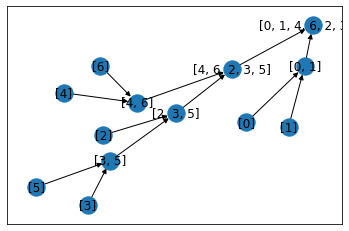

In [149]:
nx.draw_networkx(graph)

In [150]:
[x for x in nx.__dir__() if x.endswith("_layout")]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout']

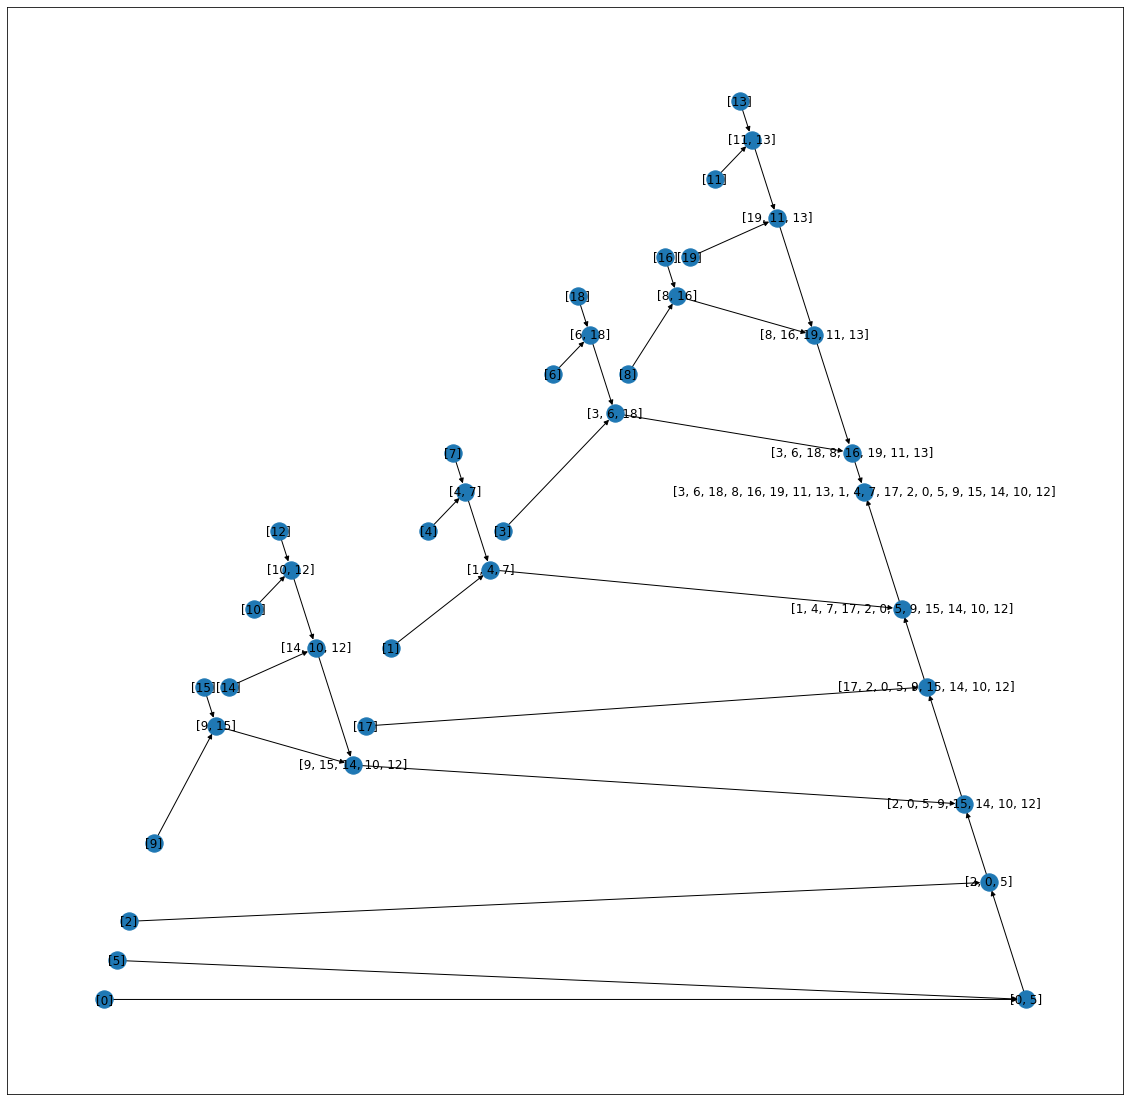

In [152]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
pos=nx.planar_layout(g1)
nx.draw_networkx(g1,pos)

In [56]:
import sys,math
def euclideanDist(list1, list2):
    dist = 0.0
    for i in range(len(list1)):
        dist += (list1[i]-list2[i])*(list1[i]-list2[i])
    
    return math.sqrt(dist)
def maxDistance(data, centers):
    dists = []
    
    for i in range(len(data)):
        minDist = sys.maxsize
        for j in range(len(centers)):
            dist = euclideanDist(data[i], centers[j])
            if dist < minDist:
                minDist = dist
        dists.append(minDist)
        
    return max(dists)

In [57]:
Data=[[2, 8], [2, 5], [6, 9], [7, 5], [5, 2]]
Centers=[[3, 5], [5, 4]]

In [58]:
maxDistance(Data,Centers)

5.0

In [59]:
def squaredErrorDistortion(data, centers):
    distortionDist = 0.0
    
    for i in range(len(data)):
        closestDist = sys.maxsize
        for j in range(len(centers)):
            dist = euclideanDist(data[i],centers[j])
            if dist < closestDist:
                closestDist = dist
        distortionDist += closestDist*closestDist
        
    return distortionDist/len(data)

In [60]:
squaredErrorDistortion(Data, Centers)

9.0